# News Mood
### - Scores can shift dramatically based on current events, the general trend is that CNN and NYT are the closest to the neutral, Fox is generally more on the positive side (probably due to Trump and the conservative agenda being the majority), and CBS and BCC are more on the extreme side (positive or negative).
### - CBS had quite a few individual tweets that were above 0.75. On the otherhand, BBC had a quite a few individual tweets that were a below -0.75.
### - From the last 100 tweets, CBS is overwhelmingly positive, then Fox, and BBC. CNN and NYT were just below neutral in the negative zone.

In [200]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import json
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [201]:
# Twitter API Keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [202]:
# Target Account
target_user = ["@bbc","@cbs","@cnn","@foxnews","@nytimes"]

df = pd.DataFrame(columns = ['account_name','tweet','time_posted','compound_score','positive_score','neutral_score','negative_score'])

In [203]:
count = 0
for user in target_user:
    
    for i in range(5):

        public_tweets = api.user_timeline(user)

        for ii in range(len(public_tweets)):
            try:
                df.set_value(count,'account_name',public_tweets[ii]["user"]["screen_name"])
                df.set_value(count,'tweet',public_tweets[ii]["text"])
                df.set_value(count,'time_posted',public_tweets[i]["created_at"])
                df.set_value(count,'compound_score',analyzer.polarity_scores(public_tweets[ii]["text"])["compound"])
                df.set_value(count,'positive_score',analyzer.polarity_scores(public_tweets[ii]["text"])["pos"])
                df.set_value(count,'neutral_score',analyzer.polarity_scores(public_tweets[ii]["text"])["neu"])
                df.set_value(count,'negative_score',analyzer.polarity_scores(public_tweets[ii]["text"])["neg"])
            except:
                print('tweet #{} failed'.format(count+1-(100*target_user.index(user))))
                break
            count += 1
            print('{} tweet #{} complete'.format(public_tweets[ii]['user']['screen_name'],(count-(100*target_user.index(user)))))

BBC tweet #1 complete
BBC tweet #2 complete
BBC tweet #3 complete
BBC tweet #4 complete
BBC tweet #5 complete
BBC tweet #6 complete
BBC tweet #7 complete
BBC tweet #8 complete
BBC tweet #9 complete
BBC tweet #10 complete
BBC tweet #11 complete
BBC tweet #12 complete
BBC tweet #13 complete
BBC tweet #14 complete
BBC tweet #15 complete
BBC tweet #16 complete
BBC tweet #17 complete
BBC tweet #18 complete
BBC tweet #19 complete
BBC tweet #20 complete
BBC tweet #21 complete
BBC tweet #22 complete
BBC tweet #23 complete
BBC tweet #24 complete
BBC tweet #25 complete
BBC tweet #26 complete
BBC tweet #27 complete
BBC tweet #28 complete
BBC tweet #29 complete
BBC tweet #30 complete
BBC tweet #31 complete
BBC tweet #32 complete
BBC tweet #33 complete
BBC tweet #34 complete
BBC tweet #35 complete
BBC tweet #36 complete
BBC tweet #37 complete
BBC tweet #38 complete
BBC tweet #39 complete
BBC tweet #40 complete
BBC tweet #41 complete
BBC tweet #42 complete
BBC tweet #43 complete
BBC tweet #44 comple

FoxNews tweet #61 complete
FoxNews tweet #62 complete
FoxNews tweet #63 complete
FoxNews tweet #64 complete
FoxNews tweet #65 complete
FoxNews tweet #66 complete
FoxNews tweet #67 complete
FoxNews tweet #68 complete
FoxNews tweet #69 complete
FoxNews tweet #70 complete
FoxNews tweet #71 complete
FoxNews tweet #72 complete
FoxNews tweet #73 complete
FoxNews tweet #74 complete
FoxNews tweet #75 complete
FoxNews tweet #76 complete
FoxNews tweet #77 complete
FoxNews tweet #78 complete
FoxNews tweet #79 complete
FoxNews tweet #80 complete
FoxNews tweet #81 complete
FoxNews tweet #82 complete
FoxNews tweet #83 complete
FoxNews tweet #84 complete
FoxNews tweet #85 complete
FoxNews tweet #86 complete
FoxNews tweet #87 complete
FoxNews tweet #88 complete
FoxNews tweet #89 complete
FoxNews tweet #90 complete
FoxNews tweet #91 complete
FoxNews tweet #92 complete
FoxNews tweet #93 complete
FoxNews tweet #94 complete
FoxNews tweet #95 complete
FoxNews tweet #96 complete
FoxNews tweet #97 complete
F

In [204]:
df.to_csv("0_tweetsdf.csv", encoding="utf-8", index=False)
df.head()

,account_name,tweet,time_posted,compound_score,positive_score,neutral_score,negative_score
0,BBC,👽🌍 Welcome back to Earth! Six people 'living o...,Fri Sep 22 18:00:10 +0000 2017,0.5093,0.162,0.838,0
1,BBC,Criminal networks smuggling rhino horn from Af...,Fri Sep 22 18:00:10 +0000 2017,-0.7579,0,0.683,0.317
2,BBC,"Tonight, the #LiveLounge Show features music f...",Fri Sep 22 18:00:10 +0000 2017,0,0,1,0
3,BBC,👀 'I can see their eyes glowing in the dark &a...,Fri Sep 22 18:00:10 +0000 2017,0,0,1,0
4,BBC,Monochrome sportswear. Kebab. Techno. Repeat. ...,Fri Sep 22 18:00:10 +0000 2017,0,0,1,0


In [205]:
bbc_comp = list(df.loc[df['account_name'] == 'BBC']['compound_score'])[::-1]
cbs_comp = list(df.loc[df['account_name'] == 'CBS']['compound_score'])[::-1]
cnn_comp = list(df.loc[df['account_name'] == 'CNN']['compound_score'])[::-1]
fox_comp = list(df.loc[df['account_name'] == 'FoxNews']['compound_score'])[::-1]
nyt_comp = list(df.loc[df['account_name'] == 'nytimes']['compound_score'])[::-1]

x_axis = list(range(100))

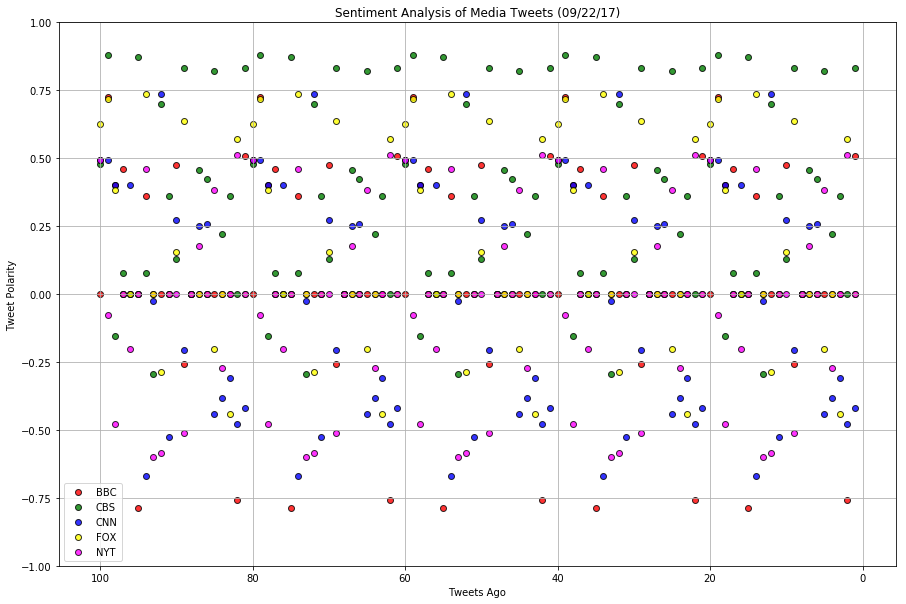

In [206]:
plt.figure(figsize=(15,10))
bbc_scatter = plt.scatter(x_axis, bbc_comp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="BBC", c='red')
cbs_scatter = plt.scatter(x_axis, cbs_comp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="CBS", c='green')
cnn_scatter = plt.scatter(x_axis, cnn_comp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="CNN", c='blue')
fox_scatter = plt.scatter(x_axis, fox_comp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="FOX", c='yellow')
nyt_scatter = plt.scatter(x_axis, nyt_comp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="NYT", c='magenta')

plt.xticks(range(0,101,20),range(100,-1,-20))
plt.title("Sentiment Analysis of Media Tweets ({})".format(time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.ylim([-1,1])
plt.legend(loc='best')

plt.savefig("1_vaderscatter.png")
plt.show()

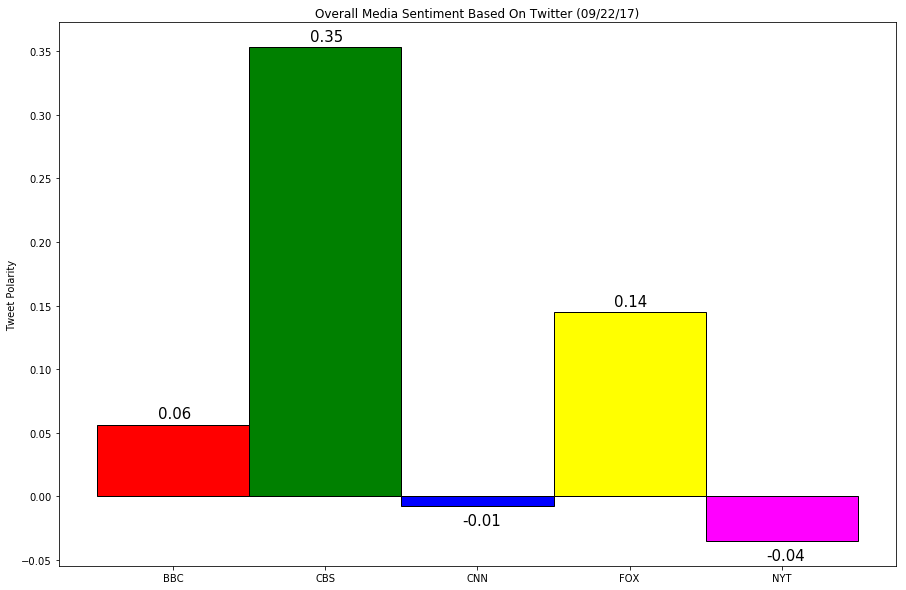

In [207]:
plt.figure(figsize=(15,10))
vader_mean = [np.mean(bbc_comp),np.mean(cbs_comp),np.mean(cnn_comp),np.mean(fox_comp),np.mean(nyt_comp)]
plt.bar(range(len(vader_mean)),vader_mean,1,align='center',edgecolor='black',color=['red','green','blue','yellow','magenta'],
       tick_label=['BBC','CBS','CNN','FOX','NYT'])

for i in range(len(vader_mean)):
    if vader_mean[i] > 0:
        plt.text(i-0.1,vader_mean[i]+0.005,np.around(vader_mean[i],decimals=2),color='black',fontsize=15)
    else:
        plt.text(i-0.1,vader_mean[i]-0.015,np.around(vader_mean[i],decimals=2),color='black',fontsize=15)

plt.title("Overall Media Sentiment Based On Twitter ({})".format(time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.savefig("2_vaderbar.png")
plt.show()